# IS 362- Final Project

### NYC Open Parking And Camera Violations

### {Presented by: Khairul Chowdhury}


### CSV Source online downloaded from:
    1)Parking Violations Issued - Fiscal Year 2020-2018 https://catalog.data.gov/dataset/parking-violations-issued-fiscal-year-2018
    2)DOF Parking Violation Codes February 7, 2020 https://data.cityofnewyork.us/Transportation/DOF-Parking-Violation-Codes/ncbg-6agr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2018.csv', 
                   dtype={'Summon Number': np.int64, 
                          'Plate ID': object, 
                         'Registration State': object, 
                         'Plate Type': object, 
                         'Issue Date': object, 
                         'Violation Code': np.int64, 
                         'Vehicle Body Type': object, 
                         'Vehicle Make': object, 
                         'Issuing Agency': object, 
                         'Street Code1': np.int64, 
                         'Street Code2': np.int64, 
                         'Street Code3': np.int64, 
                         'Vehicle Expiration Date': np.int64, 
                         'Violation Loation': np.float64, 
                         'Violation Precinct': np.int64, 
                         'Issuer Precinct': np.int64,
                         'Issuer Code': np.int64, 
                         'Issuer Command': object, 
                         'Issuer Squad': object, 
                         'Violation Time': object, 
                         'Time First Observed': object, 
                         'Violaion County': object, 
                         'Violation In Front Of Or Opposite': object, 
                         'House Number': object, 
                         'Street Name': object, 
                         'Intersecting Street': object, 
                         'Date First Observed': np.int64, 
                         'Law Section': np.int64, 
                         'Sub Division': object, 
                         'Violation Legal Code': object,
                         'Days Parking In Effect': object, 
                         'From Hours In Effect': object, 
                         'To Hours In Effect': object, 
                         'Vehicle Color': object, 
                         'Unregistered Vehicle?': np.float64, 
                         'Vehicle Year': np.int64, 
                         'Meter Number': object, 
                         'Feet From Curb': np.int64,
                         'Violation Post Code': object, 
                         'Violation Description': object, 
                         'No Standig or Stopping Violation': np.float64, 
                         'Hydrant Violation': np.float64, 
                         'Double Parking Violation': np.float64}, low_memory=False)

In [3]:
data.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                          object
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

# Converting 'Issue date' to datetime datatype

In [4]:
data['Issue Date'] = pd.to_datetime(data['Issue Date'], errors='coerce')

In [5]:
data.dtypes.head(5)


Summons Number                 int64
Plate ID                      object
Registration State            object
Plate Type                    object
Issue Date            datetime64[ns]
dtype: object

In [6]:
data.isnull().sum()


Summons Number                              0
Plate ID                                  277
Registration State                          0
Plate Type                                  0
Issue Date                                304
Violation Code                              0
Vehicle Body Type                       39163
Vehicle Make                            69549
Issuing Agency                              1
Street Code1                                0
Street Code2                                0
Street Code3                                0
Vehicle Expiration Date                     0
Violation Location                    1791530
Violation Precinct                          0
Issuer Precinct                             0
Issuer Code                                 0
Issuer Command                        1774452
Issuer Squad                          1774461
Violation Time                             60
Time First Observed                  11066915
Violation County                  

In [7]:
clear_data = data.fillna(0) # Filling null values
clear_data.isnull().sum() # Checking if any null remains

Summons Number                       0
Plate ID                             0
Registration State                   0
Plate Type                           0
Issue Date                           0
Violation Code                       0
Vehicle Body Type                    0
Vehicle Make                         0
Issuing Agency                       0
Street Code1                         0
Street Code2                         0
Street Code3                         0
Vehicle Expiration Date              0
Violation Location                   0
Violation Precinct                   0
Issuer Precinct                      0
Issuer Code                          0
Issuer Command                       0
Issuer Squad                         0
Violation Time                       0
Time First Observed                  0
Violation County                     0
Violation In Front Of Or Opposite    0
House Number                         0
Street Name                          0
Intersecting Street      

In [8]:

clear_data.head(10) # reading data

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1434219940,CWY5549,NY,PAS,2018-01-01 00:00:00,71,SDN,HYUND,P,19210,...,0,0.0,0,-,0,0,0,0.0,0.0,0.0
1,1434219963,HCR6106,NY,PAS,2018-01-01 00:00:00,71,VAN,HONDA,P,18970,...,0,0.0,0,-,0,0,0,0.0,0.0,0.0
2,1434219951,GZX6116,NY,PAS,2018-01-01 00:00:00,71,SDN,ME/BE,P,10010,...,BLK,0.0,2012,-,0,0,0,0.0,0.0,0.0
3,1429186926,HSH4411,NY,PAS,2018-01-01 00:00:00,98,SDN,NISSA,P,35380,...,BLACK,0.0,2012,-,0,0,0,0.0,0.0,0.0
4,1434582802,53216ME,NY,COM,2018-01-01 00:00:00,78,VAN,DODGE,S,5430,...,WHITE,0.0,2016,-,0,0,0,0.0,0.0,0.0
5,1434582796,581012,MA,COM,2018-01-01 00:00:00,78,VAN,DODGE,S,5430,...,WHITE,0.0,0,-,0,0,0,0.0,0.0,0.0
6,1434582784,88175MK,NY,COM,2018-01-01 00:00:00,78,VAN,FORD,S,5430,...,WHITE,0.0,2017,-,0,0,0,0.0,0.0,0.0
7,1434582772,85353JX,NY,COM,2018-01-01 00:00:00,78,VAN,FORD,S,5430,...,WHT,0.0,1999,-,0,0,0,0.0,0.0,0.0
8,1358643453,BLANKPLATE,99,999,2018-01-01 00:00:00,74,SDN,HONDA,P,0,...,LGHTB,0.0,0,-,0,0,0,0.0,0.0,0.0
9,1434199708,P78DKJ,NJ,PAS,2018-01-01 00:00:00,19,SDN,HONDA,P,10810,...,ORG,0.0,0,-,0,0,0,0.0,0.0,0.0


In [9]:
clear_data.shape  # Total rows and columns


(11721626, 43)

### Total Number for Violation by County

Violation County
NY       3912374
K        2467944
Q        2134622
BX       1498071
BK        754807
QN        571275
R         142214
ST        117732
MN         76682
0          45901
USA            1
QUEEN          1
QNS            1
PBX            1
Name: Violation Code, dtype: int64

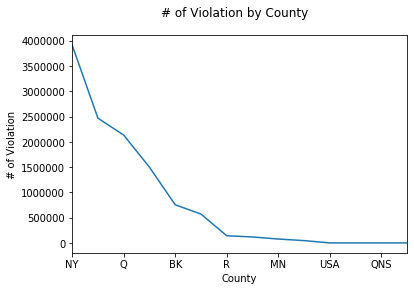

In [10]:
v_count = clear_data.groupby('Violation County')['Violation Code'].count().sort_values(ascending=False)
v_count.plot()
plt.suptitle('# of Violation by County')
plt.xlabel('County')
plt.ylabel('# of Violation')

v_count

#### Sorting Violation only for County = BX

In [13]:
# Bronx = clear_data['Violation County']== 'BX'
q_county = clear_data[['Violation County', 'Violation Code']] # Selecting only two columns
q_only = q_county[q_county['Violation County'] == 'BX']
q_only.sort_values(by='Violation Code').head(10).sort_values(by='Violation Code', ascending=False)

,Violation County,Violation Code
3102923,BX,4
9174044,BX,4
9659103,BX,3
987563,BX,3
7698977,BX,3
2592902,BX,3
10973145,BX,2
9867320,BX,1
9910578,BX,0
9832353,BX,0


### Importing another CSV with Violation fine and codes

In [19]:
column = ['Violation Code','Definition', 'Manhattan 96th St. & below', 'All Other Areas'] # setting column names
v_code = pd.read_csv('DOF_Parking_Violation_Codes_1.csv', names=column, header=None ) # imporint CSV
code = v_code.iloc[1:] # selecting column from 2nd row 
code.shape

(84, 4)

In [20]:
code


,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
1,10,"Stopping, standing or parking where a sign, st...",$115,$115
2,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
3,12,Snow Emergency: Standing or parking where stan...,$95,$95
4,13,Taxi Stand: Standing or parking where standing...,$115,$115
5,14,General No Standing: Standing or parking where...,$115,$115
...,...,...,...,...
80,05,Failure to make a right turn from a bus lane.,$115,$115
81,06,Parking a tractor-trailer on a residential str...,1st Offense - $265\n2nd Offense - $515,2nd Offense - $265\n2nd Offense - $515
82,07,Vehicles photographed going through a red ligh...,$50,$50
83,08,Vehicle idling in a restricted area.,$115,$115


In [21]:
code.dtypes

Violation Code                object
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

Since, all 4 columns are object, we need to change column 'Violation Code', 'Manhattan 96th St. & below' & 'All Other Areas' to numeric datatype. In order to do that we need to clean few rows first since, it contains strings as well. We can check row 81, 74, 24 etc.

In [22]:
row = code.loc[code['Violation Code']=='37-38']
code = code.append([row]*1, ignore_index=True) # copying row and apppend
code.shape

(85, 4)

In [23]:
code.loc[code['Violation Code']=='37-38'] # printing just to confirm

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
23,37-38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35
84,37-38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35


In [24]:
code.loc[[23],'Violation Code'] = '37' # changing values '37-38' to 37
code.loc[[84],'Violation Code'] = '38' # changing values '37-38' to 38

In [25]:
code.loc[[23, 84]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
23,37,Muni Meter --\n(37) Parking in excess of the a...,$65,$35
84,38,Muni Meter --\n(37) Parking in excess of the a...,$65,$35


In [26]:
# converting datatype of 'Violation Code' column to numeric
code['Violation Code'] = pd.to_numeric(code['Violation Code'], errors='coerce')

In [27]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [28]:
code.loc[[73, 80]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
73,94,Vehicle Release Agreement code associated with...,"100\n(Regular Tow, plus violation fine)","$200 (Heavy Tow, plus violation fine)"
80,6,Parking a tractor-trailer on a residential str...,1st Offense - $265\n2nd Offense - $515,2nd Offense - $265\n2nd Offense - $515


In [29]:
# Change values in row 73, 80
code.loc[[73], 'Manhattan 96th St. & below'] = '100'
code.loc[[73], 'All Other Areas'] = '200'
code.loc[[80], 'Manhattan 96th St. & below'] = '265'
code.loc[[80], 'All Other Areas'] = '265'

In [30]:
code.loc[[73, 80]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
73,94,Vehicle Release Agreement code associated with...,100,200
80,6,Parking a tractor-trailer on a residential str...,265,265


In [31]:
code.head(10)

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
2,12,Snow Emergency: Standing or parking where stan...,$95,$95
3,13,Taxi Stand: Standing or parking where standing...,$115,$115
4,14,General No Standing: Standing or parking where...,$115,$115
5,16,Truck Loading/Unloading: Standing or parking w...,$95,$95
6,17,Authorized Vehicles Only: Standing or parking ...,$95,$95
7,18,Bus Lane: Standing or parking where standing i...,$115,$115
8,19,Bus Stop: Standing or parking where standing i...,$115,$115
9,20,General No Parking: No parking where parking i...,$65,$60


In [32]:
# since colun, 'Manhattan 96th St. & below' & 'All other Areas' has $ sign, we need to remove $
code = code[code.columns[:]].replace('[\$,]', '', regex=True)

In [33]:
code.fillna(0) # Changing null values to 0

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,Stopping standing or parking where a sign stre...,115,115
1,11,Hotel Loading/Unloading: Standing or parking w...,115,115
2,12,Snow Emergency: Standing or parking where stan...,95,95
3,13,Taxi Stand: Standing or parking where standing...,115,115
4,14,General No Standing: Standing or parking where...,115,115
...,...,...,...,...
80,6,Parking a tractor-trailer on a residential str...,265,265
81,7,Vehicles photographed going through a red ligh...,50,50
82,8,Vehicle idling in a restricted area.,115,115
83,9,Blocking an Intersection: Obstructing traffic ...,115,115


In [34]:
code.loc[[77], 'Manhattan 96th St. & below'] = '60'
code.loc[[77], 'All Other Areas'] = '60'
code.loc[[81], 'Manhattan 96th St. & below'] = '50'
code.loc[[81], 'All Other Areas'] = '50'
code.loc[[82], 'Manhattan 96th St. & below'] = '115'
code.loc[[82], 'All Other Areas'] = '115'

In [35]:
code.loc[[77, 81, 82]]

,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
77,99,All other parking standing or stopping violati...,60,60
81,7,Vehicles photographed going through a red ligh...,50,50
82,8,Vehicle idling in a restricted area.,115,115


In [36]:

code.isnull().sum()

Violation Code                0
Definition                    0
Manhattan 96th St. & below    0
All Other Areas               1
dtype: int64

In [37]:
code.loc[[78], 'All Other Areas'] = '115'

In [38]:

code.isnull().sum()

Violation Code                0
Definition                    0
Manhattan 96th St. & below    0
All Other Areas               0
dtype: int64

In [39]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below    object
All Other Areas               object
dtype: object

In [40]:
code['Manhattan 96th St. & below'] = pd.to_numeric(code['Manhattan 96th St. & below'], errors='coerce')
code['All Other Areas'] = pd.to_numeric(code['All Other Areas'], errors='coerce')

In [41]:
code.dtypes

Violation Code                 int64
Definition                    object
Manhattan 96th St. & below     int64
All Other Areas                int64
dtype: object

In [42]:
code.head()


,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,10,Stopping standing or parking where a sign stre...,115,115
1,11,Hotel Loading/Unloading: Standing or parking w...,115,115
2,12,Snow Emergency: Standing or parking where stan...,95,95
3,13,Taxi Stand: Standing or parking where standing...,115,115
4,14,General No Standing: Standing or parking where...,115,115


## Merging two data based on 'Violation Code

In [43]:
merge = pd.merge(q_only, code, on='Violation Code')
merge.head(5)

,Violation County,Violation Code,Definition,Manhattan 96th St. & below,All Other Areas
0,BX,74,Standing or parking a vehicle without properly...,65,65
1,BX,74,Standing or parking a vehicle without properly...,65,65
2,BX,74,Standing or parking a vehicle without properly...,65,65
3,BX,74,Standing or parking a vehicle without properly...,65,65
4,BX,74,Standing or parking a vehicle without properly...,65,65


In [44]:
merge.shape


(1342582, 5)

In [45]:
merge[['Violation Code', 'All Other Areas']].agg({'All Other Areas': np.sum})


All Other Areas    96504565
dtype: int64

In [46]:
new_merge = pd.merge(clear_data, code, on='Violation Code')
new_merge.head(3)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Definition,Manhattan 96th St. & below,All Other Areas
0,1434219940,CWY5549,NY,PAS,2018-01-01 00:00:00,71,SDN,HYUND,P,19210,...,-,0,0,0,0.0,0.0,0.0,Standing or parking a vehicle without showing ...,65,65
1,1434219963,HCR6106,NY,PAS,2018-01-01 00:00:00,71,VAN,HONDA,P,18970,...,-,0,0,0,0.0,0.0,0.0,Standing or parking a vehicle without showing ...,65,65
2,1434219951,GZX6116,NY,PAS,2018-01-01 00:00:00,71,SDN,ME/BE,P,10010,...,-,0,0,0,0.0,0.0,0.0,Standing or parking a vehicle without showing ...,65,65


In [67]:
Selected_data = new_merge[['Violation Code', 
                          'Issuing Agency', 
                          'Issue Date',
                           'Violation County', 
                          'All Other Areas']]
Selected_data['# of Violation'] = Selected_data['All Other Areas']
Selected_data['Revenue'] = Selected_data['All Other Areas']

Selected_data.head()
top100_selected = Selected_data.head(100).sort_values(by='# of Violation', ascending=False)
Selected_data.head()


C:\Users\SANAYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SANAYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Violation Code,Issuing Agency,Issue Date,Violation County,All Other Areas,# of Violation,Revenue
0,71,P,2018-01-01 00:00:00,NY,65,65,65
1,71,P,2018-01-01 00:00:00,NY,65,65,65
2,71,P,2018-01-01 00:00:00,0,65,65,65
3,71,P,2018-01-01 00:00:00,Q,65,65,65
4,71,P,2018-01-01 00:00:00,K,65,65,65


#### Top Violation Code grouped by County and Total Number

# of Violation
Violation Code Violation County                
21             K                         755362
14             NY                        571663
20             NY                        445727
21             Q                         403527
38             K                         360182
               Q                         358861
46             NY                        351227
21             NY                        326755
38             NY                        321925
21             BX                        265662

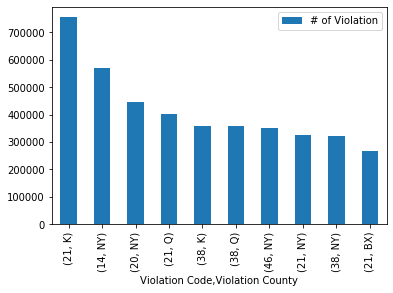

In [48]:
violation_group = Selected_data.groupby(['Violation Code', 'Violation County']).count().sort_values(by='# of Violation', ascending=False)
top10 = violation_group[['# of Violation']].head(10)
top10.plot.bar()
top10

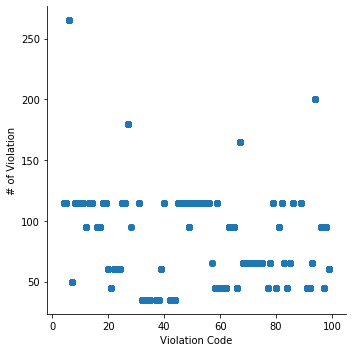

In [49]:
sns.lmplot('Violation Code', '# of Violation', data= Selected_data, fit_reg=False)

Revenue Generated in County by Violation Code

Revenue
Violation Code Violation County          
14             NY                65741245
46             NY                40391105
21             K                 33991290
20             NY                26743620
40             K                 22031585
14             K                 21887260
               Q                 19246630
21             Q                 18158715
31             NY                17957940
40             NY                17295425

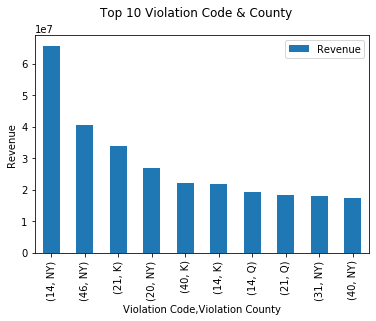

In [50]:
a_data = Selected_data.groupby(['Violation Code', 'Violation County']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar()
plt.suptitle('Top 10 Violation Code & County')
plt.ylabel('Revenue')
top10_data

Top 10 Violation Code and Revenue generated

,Revenue
Violation Code,
14,116844140
21,79134660
46,73632890
40,68644535
20,56344080
38,42671475
71,37754405
19,35712790
7,24953100


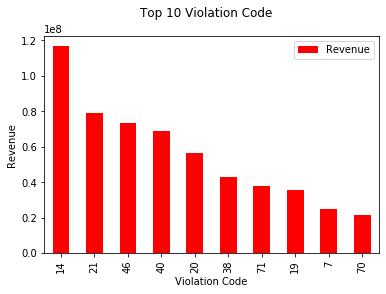

In [60]:
a_data = Selected_data.groupby(['Violation Code']). agg({'Revenue': np.sum})
top10_data = a_data.sort_values(by='Revenue', ascending=False).head(10)
top10_data.plot.bar(color='R')
plt.suptitle('Top 10 Violation Code')
plt.xlabel('Violation Code')
plt.ylabel('Revenue')
top10_data

Total generate Revenue by County

,Revenue
Violation County,
NY,318287840
K,164930930
Q,142125900
BX,96504565
BK,15061695
QN,11969220
R,10200515
MN,4538710
0,3963405


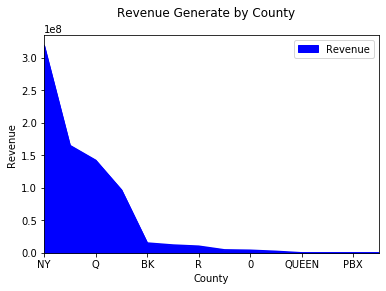

In [55]:

Revenue = Selected_data.groupby(['Violation County']).agg({'Revenue': np.sum})
Revenue_sorted = Revenue.sort_values(by='Revenue', ascending=False)
Revenue_sorted.plot.area(color='B')
plt.suptitle('Revenue Generate by County')
plt.xlabel('County')
plt.ylabel('Revenue')
Revenue_sorted

Violation County
NY       318287840
K        164930930
Q        142125900
BX        96504565
BK        15061695
QN        11969220
R         10200515
MN         4538710
0          3963405
ST         2271570
QUEEN          115
USA             95
PBX             65
QNS             60
Name: Revenue, dtype: int64

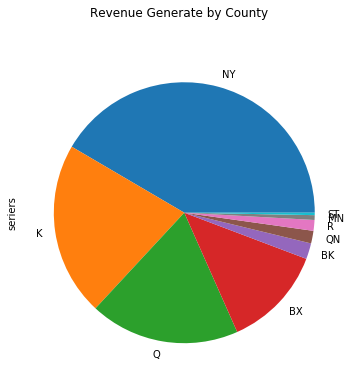

In [61]:
Rev = Revenue['Revenue'].sort_values(ascending=False)
County = ['NY', 'K', 'Q', 'BX', 'BK', 'QN', 'R', 'MN', '0', 'ST']
series = pd.Series(Rev, index=County, name='seriers')
series.plot.pie(figsize=(6,6))
plt.suptitle('Revenue Generate by County')
Rev

Analyzing total number for violation, and revenue sum by County

,count,sum,mean
Violation County,,,
NY,3902360,318287840,81.562911
K,2466670,164930930,66.863800
Q,2133804,142125900,66.606820
BX,1342582,96504565,71.879829
BK,226181,15061695,66.591336
QN,217638,11969220,54.996003
R,142091,10200515,71.788607
MN,55942,4538710,81.132423
0,45035,3963405,88.007217


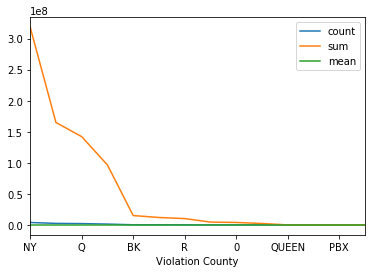

In [63]:
Analysis = new_merge[['Violation County', 'Violation Code', 'All Other Areas']]
chart = Analysis.groupby('Violation County')['All Other Areas'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
chart.plot.line()
chart

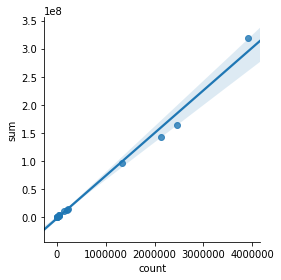

In [65]:
sns.lmplot(x='count', y='sum',data=chart, size=4)
